In [3]:
import pandas as pd
'''
def clean_data(df:pd.DataFrame):
    # Performed 2 aggregations grouped on columns: 'setname', 'solvername'
    df = df.groupby(['setname', 'solvername']).agg(objvalue_mean=('objvalue', 'mean'), runtime_mean=('runtime', 'mean')).reset_index()
    # Change column type to string for column: 'setname'
    df = df.astype({'setname': 'string'})
    # Change column type to string for column: 'solvername'
    df = df.astype({'solvername': 'string'})
    # Remove rows: 'MIXED2' 
    df = df.drop(df[df['setname'] == 'MIXED2'].index)
    return df
'''
# Loaded variable 'df' from URI: e:\repos\graphmapping-PFP-realworld\data\results\20240419_112922.csv
df = pd.read_csv(r'./testresult/testresult_per5_1 (3).csv')

df.head()
# df_clean.set_index(['setname', 'solvername'], inplace=True)
set_groups = df.groupby(['slices']).groups
conf_groups = df.groupby(['configs']).groups
conf_groups

{'Flexible': Int64Index([2, 5, 8, 11], dtype='int64'),
 'k1': Int64Index([0, 3, 6, 9], dtype='int64'),
 'k2': Int64Index([1, 4, 7, 10], dtype='int64')}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import collections

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif', size=40)

FIGPATH = f"./solution"

In [2]:

# labels = [r'$\mathtt{Greedy}$-$\mathtt{SE}$',r'$\mathtt{BnBStar}$-$2$',r'$\mathtt{BnBStar}$-$\infty$',r'$\mathtt{ILP}$-$\mathtt{SE}$']
labels = [r'k1',r'k2', r'Flexible']# COMMON SETTINGS
startx = 100
xdiff = 22
xstep = 50
barwidth = 20
# SOL_NAMES = ['GREEDY2', 'BNBSTARV7B', 'BNBSTARV7', 'ILP_GUROBI']
hatchs = ['/','.','o','']
colors = ['grey','black','goldenrod']
x_ticks = [5, 10, 15, 20]
fontsize2use = 40

In [4]:
# COMMON (EZ)
SET_NAMES = [5, 10, 15, 20]
CONFIG_NAMES = [r'k1',r'k2',r'Flexible']

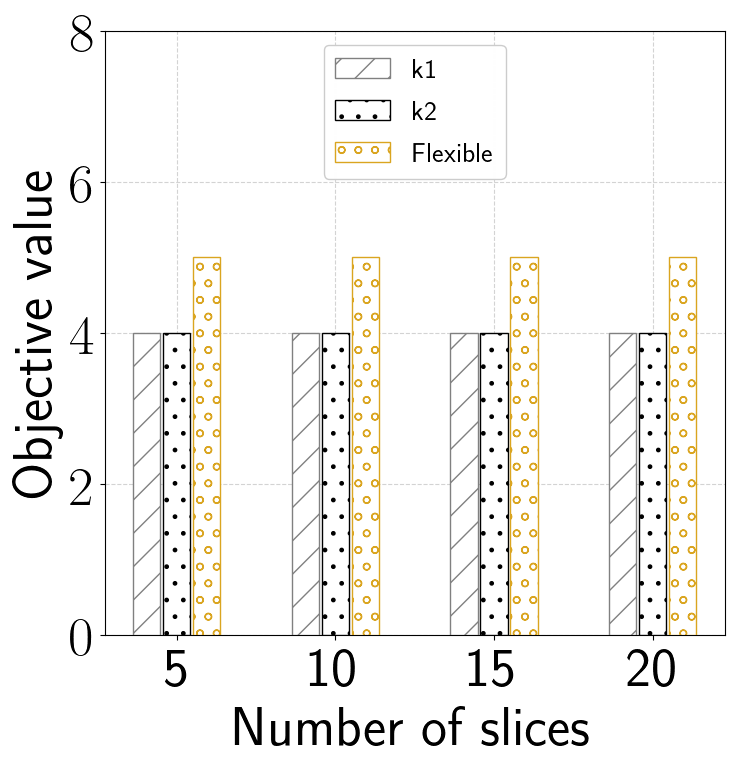

array([[100., 216., 332., 448.],
       [122., 238., 354., 470.],
       [144., 260., 376., 492.]])

In [5]:
# PLOT OBJ_VALUE (EZ)

# Prep data
# x = np.zeros((3,4))
# y = np.zeros((3,4))
x = np.zeros((4,3))
y = np.zeros((4,3))
xticklocs = []
plt.rc('font', family='sans-serif', size=40)
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in CONFIG_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = conf_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = CONFIG_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df.loc[i]
        value = data['objvalue'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()
# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.ylabel("Objective value")
plt.xlabel("Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,8])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
plt.legend(loc="upper center", prop={'size':20}, framealpha=5)
#plt.legend()
#plt.savefig(f"{FIGPATH}/objvalue_ilp.pdf", bbox_inches='tight')
plt.show()
x


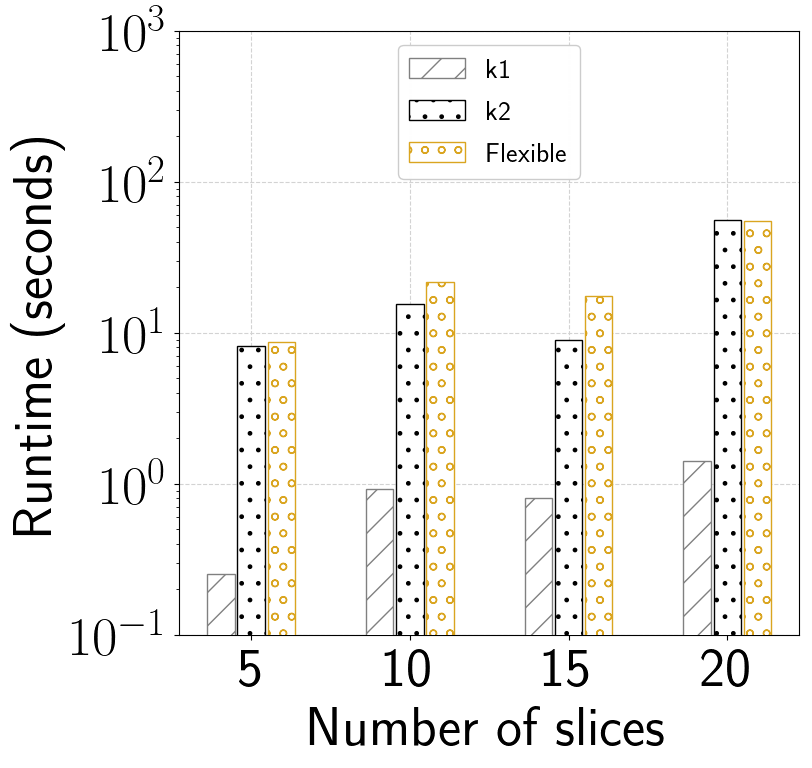

In [32]:
# PLOT RUNTIME (EZ)

# Prep data
# x = np.zeros((3,4))
# y = np.zeros((3,4))
x = np.zeros((4,3))
y = np.zeros((4,3))
xticklocs = []
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in CONFIG_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = conf_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = CONFIG_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df.loc[i]
        value = data['solvetime'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()
# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.yscale('log')
plt.ylabel(r"Runtime (seconds)")
plt.xlabel("Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# plt.ylim([0,1])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
# plt.axhline(36000, color='brown', linestyle='--', label="Timelimit")
plt.ylim([10**-1,10**3])
plt.legend(loc="upper center", prop={'size':20}, framealpha=5)
#plt.legend()
plt.savefig(f"{FIGPATH}/runtime_ilp.pdf", bbox_inches='tight')
plt.show()

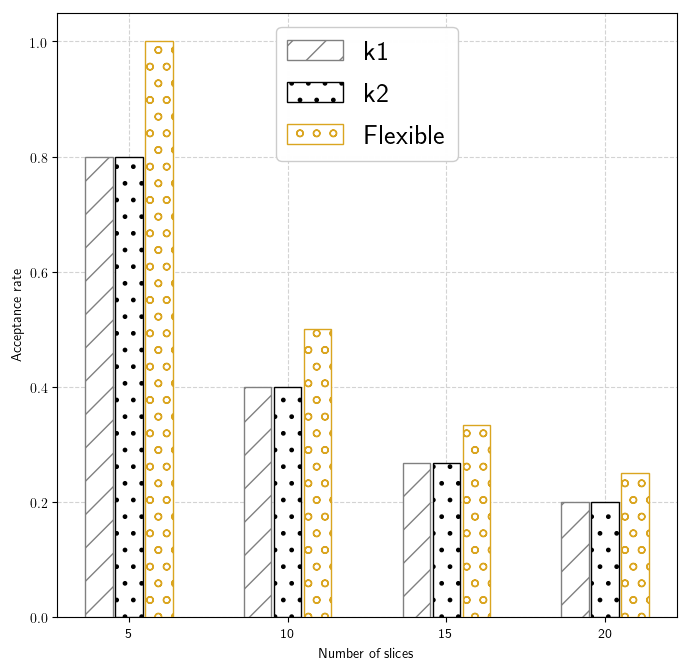

In [5]:
# PLOT acc_rate

# Prep data
x = np.zeros((4,3))
y = np.zeros((4,3))
xticklocs = []
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in CONFIG_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = conf_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = CONFIG_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df.loc[i]
        value = data['accrate'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()
# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.ylabel("Acceptance rate")
plt.xlabel("Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1.05])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
plt.legend(loc="upper center", prop={'size':20}, framealpha=5)
plt.savefig(f"{FIGPATH}/accrate_ilp.pdf", bbox_inches='tight')
plt.show()

In [9]:
df2 = pd.read_csv(r"./testresult/testresult_per5_30.csv")

df2.head()

set_groups = df2.groupby(['slices']).groups
sol_groups = df2.groupby(['algo']).groups

SET_NAMES = [5,10,15,20]
SOL_NAMES = ['GREEDY_SE','ILP_SE']

labels = ['CLC-SE', 'ILP-SE']

colors = ['black','goldenrod']

In [10]:
# PLOT ACCRate greedy vs ilp

# Prep data
startx = 0
x = np.zeros((4,2))
y = np.zeros((4,2))
plt.rc('font', family='sans-serif', size=40)
xticklocs = []
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in SOL_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = sol_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = SOL_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df2.loc[i]
        value = data['accrate'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()
# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.yscale('linear')
plt.ylabel(r"Acceptance rate")
plt.xlabel(r"Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# plt.ylim([0,1])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
plt.ylim([0,1.05])
#plt.legend()
plt.legend(loc="upper center", prop={'size':20}, framealpha=0)
plt.savefig(f"{FIGPATH}/accrate_cmp.pdf", bbox_inches='tight')
plt.show()

NameError: name 'xdiff' is not defined

In [9]:
# PLOT Runtime greedy vs ilp

# Prep data
x = np.zeros((4,2))
y = np.zeros((4,2))
xticklocs = []
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in SOL_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = sol_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = SOL_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df2.loc[i]
        value = data['runtime'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()
# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.yscale('log')
plt.ylabel(r"Runtime (seconds)")
plt.xlabel(r"Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# plt.ylim([0,1])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
plt.ylim([10**-1,10**2])
#plt.legend()
plt.legend(loc="upper center", prop={'size':20}, framealpha=5)
#plt.savefig(f"{FIGPATH}/runtime_cmp.pdf", bbox_inches='tight')
plt.show()
x
y

RuntimeError: latex was not able to process the following string:
b'GREEDY_SE'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(C:/Users/admin/.matplotlib/tex.cache/3d7c9870d63a2b5d095d1f22d1a946c8.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
(C:\Users\admin\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (3d7c9870d63a2b5d095d1f22d1a946c8.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...ze{20.000000}{25.000000}{\sffamily GREEDY_
                                                  SE}
No pages of output.
Transcript written on 3d7c9870d63a2b5d095d1f22d1a946c8.log.




<Figure size 800x800 with 1 Axes>

array([[ 0.9377554 ,  0.8457014 ,  0.8166063 ,  0.8200678 ],
       [ 8.700804  , 21.77601027, 17.55387974, 55.02667189]])

In [11]:
df3 = pd.read_csv(r"./testresult/testresult_per5_1.csv")

df3.head()

set_groups = df3.groupby(['slices']).groups
conf_groups = df3.groupby(['config']).groups

labels = ['k1','k2']

colors = ['black','goldenrod']
CONFIG_NAMES = ['k1','k2']
SET_NAMES = [5,10,15,20]


In [20]:
# Prep data
# x = np.zeros((3,4))
# y = np.zeros((3,4))
x = np.zeros((4,2))
y = np.zeros((4,2))
xticklocs = []
plt.rc('font', family='sans-serif', size=40)
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in CONFIG_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = conf_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = CONFIG_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df3.loc[i]
        value = data['accrate'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()

# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.ylabel("Acc rate for each config")
plt.xlabel("Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1])
plt.xticks(xticklocs, labels=x_ticks)


plt.bar(x[0],y[0], width=barwidth, hatch=hatchs[0], label=labels[0], edgecolor=colors[0], fill=True, color='w', zorder=3)
plt.bar(x[0],y[1], width=barwidth, hatch=hatchs[1], label=labels[1], edgecolor=colors[1], fill=True, color='w', zorder=3, bottom=y[0])
# plt.bar(x,y, width=barwidth)
plt.legend(loc="upper center",ncol = 1,prop={'size':20}, framealpha=5)
#plt.legend()
plt.savefig(f"{FIGPATH}/objvalue_ilp.pdf", bbox_inches='tight')
plt.show()

KeyError: 'None of [[8]] are in the [index]'

In [4]:
df4 = pd.read_csv(r"./testresult/testresult_per5_30.csv")

df4.head()

set_groups = df4.groupby(['slices']).groups
conf_groups = df4.groupby(['algo']).groups

labels = ['CLC-SE','ILP-SE']
x_ticks = [5,10,15,20]

colors = ['black','goldenrod']

CONFIG_NAMES = ['GREEDY_SE','ILP_SE']
SET_NAMES = [5,10,15,20]


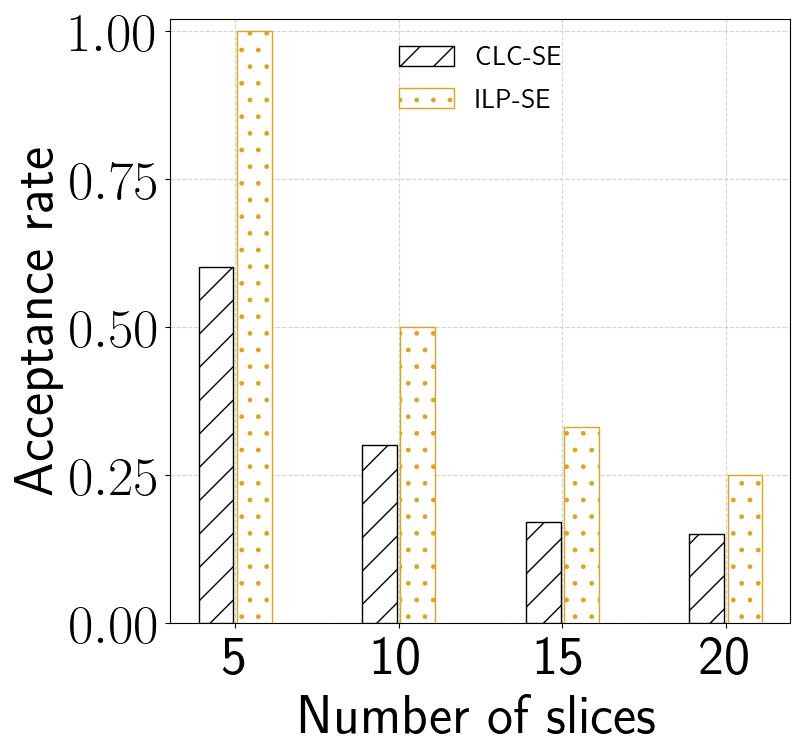

In [6]:
# Prep data
x = np.zeros((4,2))
y = np.zeros((4,2))
plt.rc('font', family='sans-serif', size=40)
xticklocs = []
xxx = startx
jj = 0
for set_indx in SET_NAMES:
    jj = 0
    for sol_indx in CONFIG_NAMES:
        set_i = set_groups[set_indx].values
        sol_i = conf_groups[sol_indx].values
        iloc = SET_NAMES.index(set_indx)
        yloc = CONFIG_NAMES.index(sol_indx)
        i = [j for j in sol_i if j in set_i]
        # i = groups[indx].values[0]
        data = df4.loc[i]
        value = data['accrate'].values[0]
        x[iloc][yloc] = xxx
        y[iloc][yloc] = value
        # print(set_indx, sol_indx)
        xxx += xdiff
        jj += 1
    xxx += xstep
    jj -= 1
    xticklocs.append(np.average(x[SET_NAMES.index(set_indx)]))
x = x.transpose()
y = y.transpose()

# Plot
plt.figure(figsize=(8,8), dpi=100)
plt.yscale('linear')
plt.ylabel(r"Acceptance rate")
plt.xlabel(r"Number of slices")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# plt.ylim([0,1])
plt.xticks(xticklocs, labels=x_ticks)

for xi in range(len(x)):
    plt.bar(x[xi],y[xi], width=barwidth, hatch=hatchs[xi], label=labels[xi], edgecolor=colors[xi], fill=True, color='w', zorder=3)
# plt.bar(x,y, width=barwidth)
plt.ylim([0,1.02])
#plt.legend()
plt.legend(loc="upper center", prop={'size':20}, framealpha=0)
plt.savefig(f"{FIGPATH}/accrate_cmp.pdf", bbox_inches='tight')
plt.show()